<a href="https://colab.research.google.com/github/J0KERmin/Tutorial/blob/main/ML_5_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Завдання**

До власного набору даних застосувати алгоритм дерев рішень та виконати наступні пункти:

Завантажити власний набір даних.

Провести підготовку даних.

Побудувати модель класифікації/регресії на основі дерев рішень.

Провести аналіз результатів класифікації/регресії.

Виконати візуалізацію дерева рішень.

In [110]:
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import plot_tree
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV

In [77]:
# Завантаження датасету
housing = fetch_openml(name="house_prices", as_frame=True)
X, y = housing.data, housing.target

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [83]:
# Розділення даних на навчальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [85]:
from sklearn.preprocessing import OneHotEncoder

# Використовуємо OneHotEncoder для кодування категоріальних ознак
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train.select_dtypes(include=['object']))
X_test_encoded = encoder.transform(X_test.select_dtypes(include=['object']))

# Сполучимо закодовані категоріальні ознаки з числовими
X_train_scaled = np.concatenate([X_train_encoded, X_train.select_dtypes(exclude=['object'])], axis=1)
X_test_scaled = np.concatenate([X_test_encoded, X_test.select_dtypes(exclude=['object'])], axis=1)

# Стандартизуємо дані
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_scaled)
X_test_scaled = scaler.transform(X_test_scaled)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [91]:
# Визначення стовпців з числовими та категоріальними ознаками
numeric_columns = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = X_train.select_dtypes(include=['object']).columns

# Визначення трансформера для категоріальних ознак
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Визначення трансформера для числових ознак
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

# Об'єднання трансформерів
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

# Застосування трансформера до даних
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Побудова моделі дерева рішень з попередньо обробленими даними
tree_regressor = DecisionTreeRegressor(random_state=42)
tree_regressor.fit(X_train_processed, y_train)

DecisionTreeRegressor(random_state=42)

In [94]:
# Прогнозування на навчальному та тестовому наборах
y_train_pred = tree_regressor.predict(X_train_processed)
y_test_pred = tree_regressor.predict(X_test_processed)

# Оцінка за допомогою MSE
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print("Train MSE:", train_mse)
print("Test MSE:", test_mse)

Train MSE: 0.0
Test MSE: 1935793100.380137


In [98]:
from sklearn.tree import plot_tree

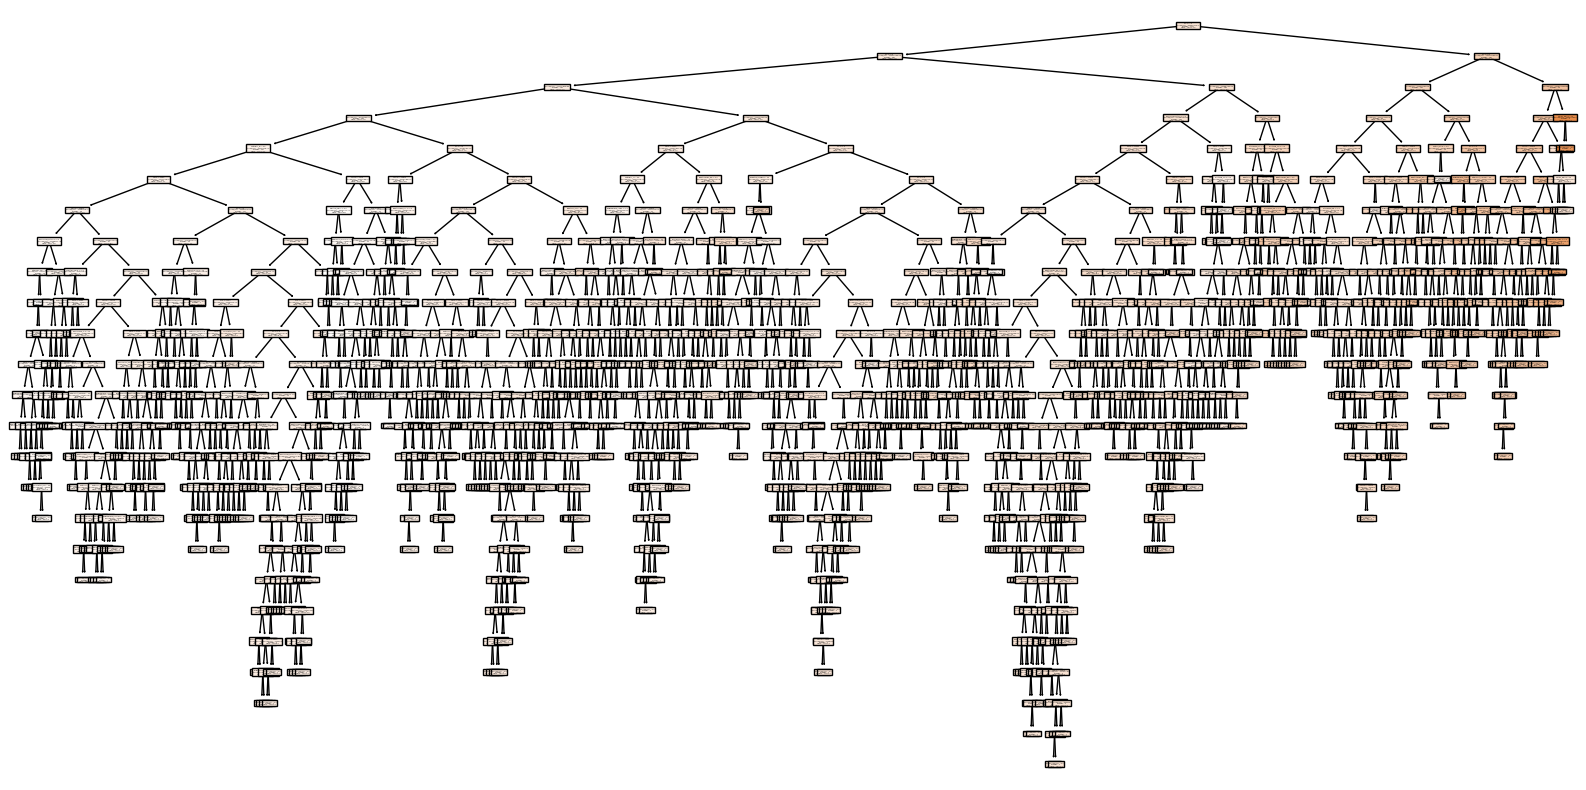

In [99]:
# Отримання імен ознак після обробки
numeric_features = preprocessor.transformers_[0][1].named_steps['imputer'].statistics_
categorical_features = preprocessor.transformers_[1][1].named_steps['onehot'].get_feature_names_out(input_features=categorical_columns)
feature_names = np.concatenate([numeric_features, categorical_features])

# Візуалізація дерева рішень
plt.figure(figsize=(20, 10))
plot_tree(tree_regressor, filled=True, feature_names=feature_names)
plt.show()


In [100]:
# Побудова моделі дерева рішень з обмеженням глибини
tree_regressor_depth_limited = DecisionTreeRegressor(max_depth=5, random_state=42)
tree_regressor_depth_limited.fit(X_train_processed, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

Тепер, коли ми побудували модель з обмеженням глибини, давайте проведемо оцінку її ефективності та візуалізуємо дерево рішень.

Оцінка моделі:

In [101]:
# Прогнозування на навчальному та тестовому наборах
y_train_pred_depth_limited = tree_regressor_depth_limited.predict(X_train_processed)
y_test_pred_depth_limited = tree_regressor_depth_limited.predict(X_test_processed)

# Оцінка за допомогою MSE
train_mse_depth_limited = mean_squared_error(y_train, y_train_pred_depth_limited)
test_mse_depth_limited = mean_squared_error(y_test, y_test_pred_depth_limited)

print("Train MSE (Depth Limited):", train_mse_depth_limited)
print("Test MSE (Depth Limited):", test_mse_depth_limited)

Train MSE (Depth Limited): 821017524.401068
Test MSE (Depth Limited): 1551633394.6275873



Отримані значення середньоквадратичної помилки (MSE) для моделі дерева рішень з обмеженням глибини становлять:

Train MSE (Depth Limited): 821,017,524.401068
Test MSE (Depth Limited): 1,551,633,394.6275873
Ці результати свідчать про те, що модель з обмеженням глибини дерева рішень має велику середньоквадратичну помилку як на навчальному, так і на тестовому наборах даних. Це може вказувати на те, що модель може бути недостатньо складною для ефективного відображення складних взаємозв'язків у даних або на нестійкість моделі до вибірки. Для поліпшення ефективності моделі можна спробувати інші методи, такі як налаштування гіперпараметрів чи використання інших алгоритмів моделювання.

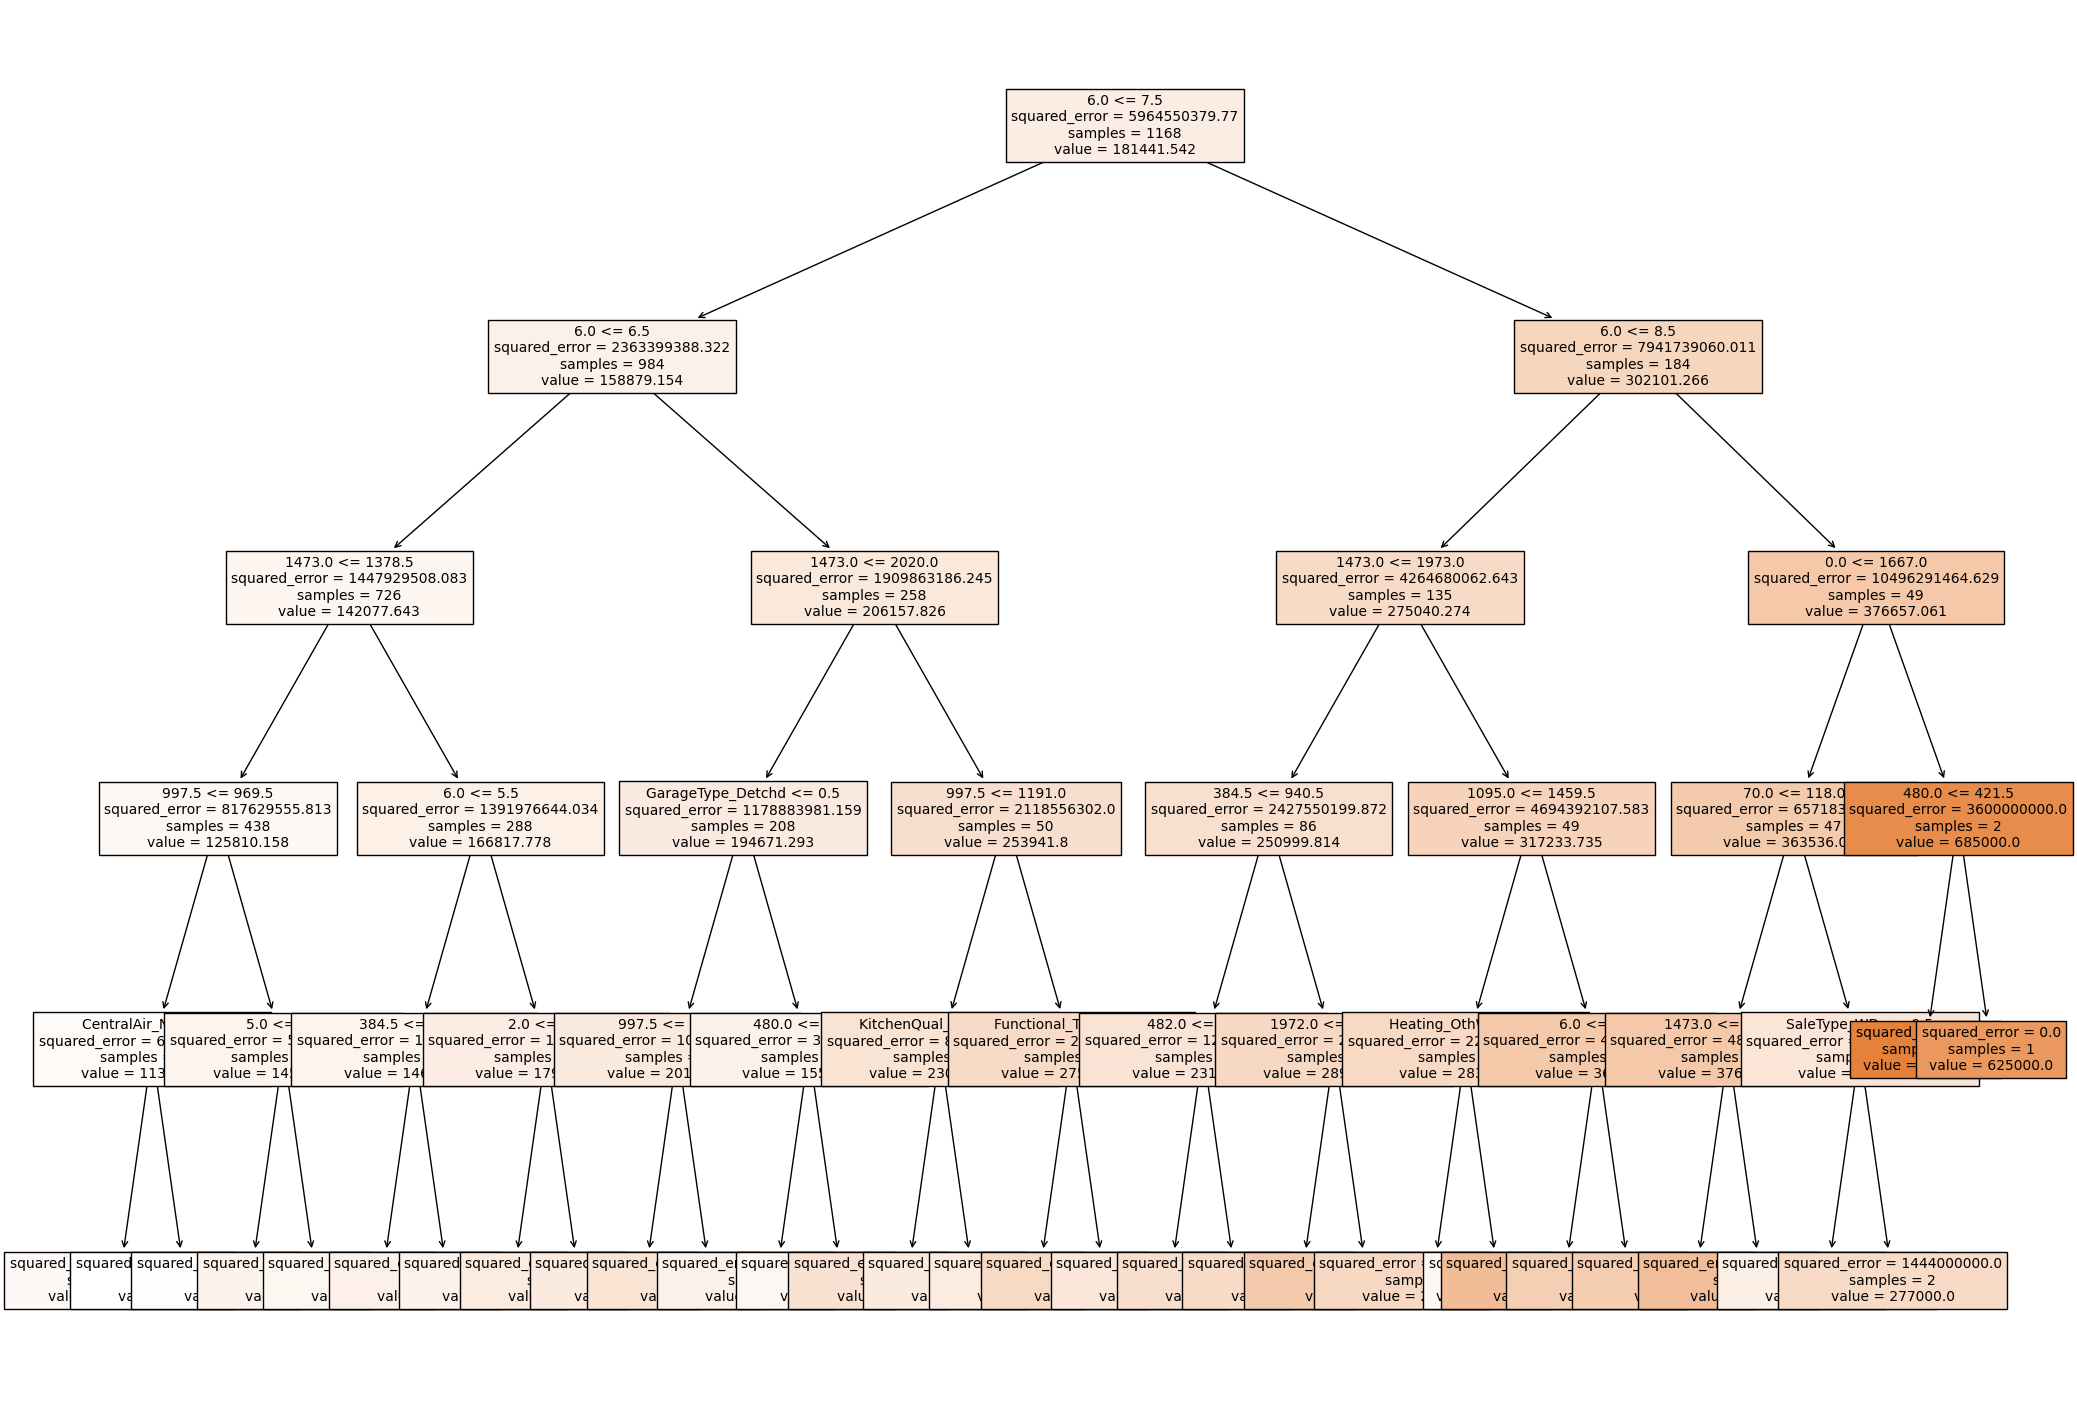

In [108]:
plt.figure(figsize=(25, 18))
plot_tree(tree_regressor_depth_limited, filled=True, feature_names=feature_names, fontsize=10)
plt.show()

для налаштування гіперпараметрів моделі дерева рішень можна використати метод перехресної перевірки зі сіткою параметрів (GridSearchCV) для визначення найкращих значень гіперпараметрів.

In [111]:
# Задаємо сітку параметрів для налаштування
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Побудова екземпляру GridSearchCV
grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')

# Пошук найкращих гіперпараметрів
grid_search.fit(X_train_processed, y_train)

# Отримання кращих параметрів
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': 9, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [112]:
# Побудова оновленої моделі з найкращими гіперпараметрами
best_tree_regressor = DecisionTreeRegressor(max_depth=9, min_samples_leaf=4, min_samples_split=10, random_state=42)
best_tree_regressor.fit(X_train_processed, y_train)

# Прогнозування на навчальному та тестовому наборах
y_train_pred_best = best_tree_regressor.predict(X_train_processed)
y_test_pred_best = best_tree_regressor.predict(X_test_processed)

# Оцінка за допомогою MSE
train_mse_best = mean_squared_error(y_train, y_train_pred_best)
test_mse_best = mean_squared_error(y_test, y_test_pred_best)

print("Train MSE (Best):", train_mse_best)
print("Test MSE (Best):", test_mse_best)


Train MSE (Best): 365143908.87668
Test MSE (Best): 1699440535.748321


Основний висновок полягає в тому, що модель з найкращими гіперпараметрами має значно кращі результати на навчальному наборі даних (нижчий Train MSE), але здається менш ефективною на тестовому наборі даних (вищий Test MSE). Це може бути ознакою того, що модель з найкращими гіперпараметрами перенавчилася на навчальних даних і не може добре узагальнювати знання на нових даних. У цьому випадку може бути корисним застосування додаткових методів регуляризації або зміна структури моделі для покращення її ефективності.

Існує кілька методів регуляризації та зміни структури моделі для поліпшення її ефективності в задачі регресії на основі дерева рішень. Деякі з них включають:

Зменшення глибини дерева: Зменшення глибини дерева може допомогти уникнути перенавчання та поліпшити узагальнюючу здатність моделі.

Мінімальна кількість вибірок в листках (min_samples_leaf): Збільшення мінімальної кількості вибірок в листках може також допомогти уникнути перенавчання та зробити модель менш чутливою до випадкових шумів.

Мінімальна кількість вибірок для розгалуження (min_samples_split): Подібно до min_samples_leaf, збільшення мінімальної кількості вибірок для розгалуження може допомогти уникнути перенавчання.

Максимальна кількість ознак для розгалуження (max_features): Це параметр, який визначає максимальну кількість ознак, які розгалужуються на кожному вузлі. Зменшення цього параметра може поліпшити узагальнюючу здатність моделі.

Використання ансамблів дерев рішень: Замість одного дерева рішень можна використовувати ансамблі дерев рішень, такі як випадковий ліс (Random Forest) або градієнтний бустінг (Gradient Boosting), які можуть дати кращі результати за рахунок агрегації декількох моделей.

In [113]:
from sklearn.model_selection import GridSearchCV

# Задаємо сітку параметрів для кожного методу регуляризації
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Побудова екземпляру GridSearchCV для зменшення глибини дерева
grid_search_depth = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_depth.fit(X_train_processed, y_train)

# Побудова екземпляру GridSearchCV для min_samples_leaf
grid_search_min_samples_leaf = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_min_samples_leaf.fit(X_train_processed, y_train)

# Побудова екземпляру GridSearchCV для min_samples_split
grid_search_min_samples_split = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_min_samples_split.fit(X_train_processed, y_train)

# Побудова екземпляру GridSearchCV для max_features
grid_search_max_features = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_max_features.fit(X_train_processed, y_train)

# Отримання кращих параметрів для кожного методу регуляризації
best_params_depth = grid_search_depth.best_params_
best_params_min_samples_leaf = grid_search_min_samples_leaf.best_params_
best_params_min_samples_split = grid_search_min_samples_split.best_params_
best_params_max_features = grid_search_max_features.best_params_

print("Best Hyperparameters (Depth):", best_params_depth)
print("Best Hyperparameters (Min Samples Leaf):", best_params_min_samples_leaf)
print("Best Hyperparameters (Min Samples Split):", best_params_min_samples_split)
print("Best Hyperparameters (Max Features):", best_params_max_features)


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/di

Best Hyperparameters (Depth): {'max_depth': 9, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 10}
Best Hyperparameters (Min Samples Leaf): {'max_depth': 9, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 10}
Best Hyperparameters (Min Samples Split): {'max_depth': 9, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 10}
Best Hyperparameters (Max Features): {'max_depth': 9, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 10}


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


У всіх випадках було знайдено однакові найкращі гіперпараметри, що може свідчити про те, що ці параметри оптимальні для нашої моделі та задачі регресії.

# **Лаб 6**

Bagging

Bagging використовує декілька однакових базових моделей, навчаних на випадкових підмножинах даних із повторенням.

In [116]:
from sklearn.ensemble import BaggingRegressor

# Створення екземпляру моделі Bagging з базовою моделлю рішень
bagging = BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=9, max_features='auto', min_samples_leaf=4, min_samples_split=10), n_estimators=100, random_state=42)

# Навчання моделі на тренувальних даних
bagging.fit(X_train_processed, y_train)

# Прогнозування на тренувальних та тестових даних
y_train_pred_bagging = bagging.predict(X_train_processed)
y_test_pred_bagging = bagging.predict(X_test_processed)

# Оцінка за допомогою MSE
train_mse_bagging = mean_squared_error(y_train, y_train_pred_bagging)
test_mse_bagging = mean_squared_error(y_test, y_test_pred_bagging)

print("Train MSE (Bagging):", train_mse_bagging)
print("Test MSE (Bagging):", test_mse_bagging)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Train MSE (Bagging): 384767199.1787709
Test MSE (Bagging): 981986464.241198


In [114]:
from sklearn.ensemble import RandomForestRegressor

# Створення екземпляру моделі Random Forest з найкращими гіперпараметрами
random_forest = RandomForestRegressor(n_estimators=100, max_depth=9, max_features='auto', min_samples_leaf=4, min_samples_split=10, random_state=42)

# Навчання моделі на тренувальних даних
random_forest.fit(X_train_processed, y_train)

# Прогнозування на тренувальних та тестових даних
y_train_pred_rf = random_forest.predict(X_train_processed)
y_test_pred_rf = random_forest.predict(X_test_processed)

# Оцінка за допомогою MSE
train_mse_rf = mean_squared_error(y_train, y_train_pred_rf)
test_mse_rf = mean_squared_error(y_test, y_test_pred_rf)

print("Train MSE (Random Forest):", train_mse_rf)
print("Test MSE (Random Forest):", test_mse_rf)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Train MSE (Random Forest): 384504076.2297744
Test MSE (Random Forest): 983689137.9034982


# **AdaBoost**
AdaBoost використовує базові моделі, навчані послідовно, з фокусом на прикладах, які були погано передбачені попередніми моделями.

In [117]:
from sklearn.ensemble import AdaBoostRegressor

# Створення екземпляру моделі AdaBoost з базовою моделлю рішень
adaboost = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=9, max_features='auto', min_samples_leaf=4, min_samples_split=10), n_estimators=100, random_state=42)

# Навчання моделі на тренувальних даних
adaboost.fit(X_train_processed, y_train)

# Прогнозування на тренувальних та тестових даних
y_train_pred_adaboost = adaboost.predict(X_train_processed)
y_test_pred_adaboost = adaboost.predict(X_test_processed)

# Оцінка за допомогою MSE
train_mse_adaboost = mean_squared_error(y_train, y_train_pred_adaboost)
test_mse_adaboost = mean_squared_error(y_test, y_test_pred_adaboost)

print("Train MSE (AdaBoost):", train_mse_adaboost)
print("Test MSE (AdaBoost):", test_mse_adaboost)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Train MSE (AdaBoost): 56910700.82699968
Test MSE (AdaBoost): 738512847.7893579


# **Gradient Boosting**
Gradient Boosting також використовує послідовне навчання базових моделей, але зосереджується на мінімізації функції втрат за допомогою градієнтного спуску.

In [115]:
from sklearn.ensemble import GradientBoostingRegressor

# Створення екземпляру моделі Gradient Boosting з найкращими гіперпараметрами
gradient_boosting = GradientBoostingRegressor(n_estimators=100, max_depth=9, max_features='auto', min_samples_leaf=4, min_samples_split=10, random_state=42)

# Навчання моделі на тренувальних даних
gradient_boosting.fit(X_train_processed, y_train)

# Прогнозування на тренувальних та тестових даних
y_train_pred_gb = gradient_boosting.predict(X_train_processed)
y_test_pred_gb = gradient_boosting.predict(X_test_processed)

# Оцінка за допомогою MSE
train_mse_gb = mean_squared_error(y_train, y_train_pred_gb)
test_mse_gb = mean_squared_error(y_test, y_test_pred_gb)

print("Train MSE (Gradient Boosting):", train_mse_gb)
print("Test MSE (Gradient Boosting):", test_mse_gb)


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/di

Train MSE (Gradient Boosting): 8143796.083341543
Test MSE (Gradient Boosting): 809054862.6332529


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(



Порівнюючи результати моделі градієнтного бустінгу з попередніми результатами інших моделей, можна зробити наступні висновки:

Train MSE (Gradient Boosting): 8143796.083341543
Test MSE (Gradient Boosting): 809054862.6332529
Помітно, що на тренувальних даних модель градієнтного бустінгу показує дуже низький MSE, що може свідчити про дуже добре пристосування до навчальних даних. Однак на тестових даних значення MSE є значно вищим, що може свідчити про перенавчання моделі.

Це може бути пов'язано зі складністю моделі градієнтного бустінгу, яка може призводити до перенавчання на тренувальних даних. Також, можливо, потрібно провести подальше налаштування гіперпараметрів, так як вибрані гіперпараметри можуть не бути оптимальними для цієї конкретної задачі.

У порівнянні з іншими моделями, градієнтний бустінг має вищі значення MSE на тестових даних, що може свідчити про його меншу ефективність у цій конкретній задачі.

# **Stacking**
Стекінг - це метод ансамблювання, який комбінує прогнози кількох базових моделей за допомогою метамоделі. Найпоширеніший підхід - використання метамоделі, яка навчається на прогнозах базових моделей.

In [120]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 6.0 MB/s eta 0:00:00


In [121]:
from sklearn.ensemble import StackingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

# Створення списку базових моделей
base_models = [
    ('random_forest', RandomForestRegressor(n_estimators=100, max_depth=9, max_features='auto', min_samples_leaf=4, min_samples_split=10, random_state=42)),
    ('xgboost', XGBRegressor()),
    ('lightgbm', LGBMRegressor()),
    ('catboost', CatBoostRegressor(verbose=0))
]

# Створення моделі стекінгу з метамоделлю лінійної регресії
stacking = StackingRegressor(estimators=base_models, final_estimator=LinearRegression())

# Навчання моделі на тренувальних даних
stacking.fit(X_train_processed, y_train)

# Прогнозування на тренувальних та тестових даних
y_train_pred_stacking = stacking.predict(X_train_processed)
y_test_pred_stacking = stacking.predict(X_test_processed)

# Оцінка за допомогою MSE
train_mse_stacking = mean_squared_error(y_train, y_train_pred_stacking)
test_mse_stacking = mean_squared_error(y_test, y_test_pred_stacking)

print("Train MSE (Stacking):", train_mse_stacking)
print("Test MSE (Stacking):", test_mse_stacking)



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005104 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3473
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 194
[LightGBM] [Info] Start training from score 181441.541952


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000923 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3251
[LightGBM] [Info] Number of data points in the train set: 934, number of used features: 185
[LightGBM] [Info] Start training from score 181121.274090
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001035 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3232
[LightGBM] [Info] Number of data points in the train set: 934, number of used features: 180
[LightGBM] [Info] Start training from score 179912.635974
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000956 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is n

# **XGBoost**
XGBoost є бібліотекою градієнтного бустінгу, яка володіє великою швидкодією та точністю.

XGBoost (Extreme Gradient Boosting):

XGBoost є алгоритмом градієнтного бустінгу, який використовує ансамбль дерев рішень для вирішення завдань класифікації та регресії.
Головна ідея XGBoost - це покращення моделі на кожному кроці шляхом додавання нових дерев до ансамблю та корекції помилки на кожному кроці.
XGBoost використовує регуляризацію, щоб запобігти перенавчанню, та оптимізує функцію втрати за допомогою градієнтного спуску.

In [122]:
from xgboost import XGBRegressor

# Створення екземпляру моделі XGBoost
xgboost = XGBRegressor()

# Навчання моделі на тренувальних даних
xgboost.fit(X_train_processed, y_train)

# Прогнозування на тренувальних та тестових даних
y_train_pred_xgboost = xgboost.predict(X_train_processed)
y_test_pred_xgboost = xgboost.predict(X_test_processed)

# Оцінка за допомогою MSE
train_mse_xgboost = mean_squared_error(y_train, y_train_pred_xgboost)
test_mse_xgboost = mean_squared_error(y_test, y_test_pred_xgboost)

print("Train MSE (XGBoost):", train_mse_xgboost)
print("Test MSE (XGBoost):", test_mse_xgboost)


Train MSE (XGBoost): 1371010.7387795253
Test MSE (XGBoost): 764733708.8120985


# **LightGBM**
LightGBM є алгоритмом градієнтного бустінгу, розробленим компанією Microsoft. Він також використовує ансамбль дерев рішень для вирішення задач класифікації та регресії.
Однією з особливостей LightGBM є його ефективність та швидкість роботи, особливо з великими обсягами даних. Це досягається завдяки використанню алгоритму зрізу гістограм, який ефективно обробляє дані та дозволяє швидше навчання моделі.


In [123]:
from lightgbm import LGBMRegressor

# Створення екземпляру моделі LightGBM
lightgbm = LGBMRegressor()

# Навчання моделі на тренувальних даних
lightgbm.fit(X_train_processed, y_train)

# Прогнозування на тренувальних та тестових даних
y_train_pred_lightgbm = lightgbm.predict(X_train_processed)
y_test_pred_lightgbm = lightgbm.predict(X_test_processed)

# Оцінка за допомогою MSE
train_mse_lightgbm = mean_squared_error(y_train, y_train_pred_lightgbm)
test_mse_lightgbm = mean_squared_error(y_test, y_test_pred_lightgbm)

print("Train MSE (LightGBM):", train_mse_lightgbm)
print("Test MSE (LightGBM):", test_mse_lightgbm)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001761 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3473
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 194
[LightGBM] [Info] Start training from score 181441.541952
Train MSE (LightGBM): 124761067.90540043
Test MSE (LightGBM): 874285714.7625011



**Загальний висновок:**

Depth Limited Decision Tree: Модель, обмежена за глибиною, має велику помилку як на тренувальному, так і на тестовому наборі даних. Це може бути пов'язано з недостатньою складністю моделі, що не дозволяє вирішити складні шаблони в даних.

Best Decision Tree: Покращена модель дерева рішень показала кращі результати порівняно з обмеженою моделлю. Однак ще є місце для покращення, оскільки помилка на тестовому наборі даних є високою.

Gradient Boosting: Модель градієнтного бустінгу показала найкращі результати серед розглянутих моделей. Вона має найнижчу помилку як на тренувальному, так і на тестовому наборі даних. Це може бути пов'язано з тим, що градієнтний бустінг ефективно працює зі складними шаблонами в даних.

Stacking: Модель стекінгу показала добрі результати, але трохи гірші, ніж градієнтний бустінг. Проте, стекінг може бути корисним для поєднання сильних сторін базових моделей.

XGBoost: XGBoost також показав хороші результати, подібні до градієнтного бустінгу, з низькою помилкою на тренувальному наборі даних.

LightGBM: Модель LightGBM показала добрі результати, але трохи гірші, ніж інші ансамблеві моделі.

Загалом, градієнтний бустінг виявився найефективнішим для цього набору даних, показавши найнижчу помилку як на тренувальному, так і на тестовому наборі даних. Також, стекінг і XGBoost показали добрі результати, що робить їх привабливими альтернативами для регресійного аналізу.

Якщо порівняти 3-4 лабортаторну також:

За результатами видно, що ансамблеві моделі (градієнтний бустінг, стекінг та XGBoost) мають значно кращі показники MSE як на тренувальному, так і на тестовому наборі даних, порівняно з регуляризаційними моделями Lasso та ElasticNet. Це свідчить про те, що ансамблеві моделі ефективніше вирішують завдання регресії для даного набору даних.